# Deep learning の練習

* scikit-learn の iris データを例に、ai-chan の NetTrainer クラスで SimpleNet のパラメータ調整を行います
* データを 5 分割して、一つを評価用、残りの４つを使って順繰りにパラメータの調整を行います
* そのため iris_simple に比べて、学習結果のネットワークの制度が 1 桁ほど改善されています


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

import sys,os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from ai_chan import nnet
from ai_chan import layer
from ai_chan import func
from ai_chan import weight
from ai_chan import train

# データの読み込み　

In [5]:
# データセットのロード
# iris.data = [(がく片の長さ , がく片の幅 , 花びらの長さ , 花びらの幅)]
iris = datasets.load_iris()
# データをシャッフルする (ミソ!)
np.random.shuffle(iris.data)
x_vals = np.array([x[0:3] for x in iris.data])
d_vals = np.array([x[3] for x in iris.data])

In [6]:
net = nnet.SimpleNet()

# 入力データを(初期状態で)標準化スコアに変換する前処理層
# 3→6
net.add_pre_layer(layer.Normalize(), x=x_vals.T)

# 中間層は 6→60
net.add_layer(60)

# 出力層は 60→1
net.add_layer(1, layer_factory=layer.Random(), activate_function=func.IdentityMapping())

# 学習係数は 0.001固定 (呼び出し回数で減衰させるとうまく収束しない)
# net.set_learning_rate(grad.Shrink(rate=0.01))

# 正則化（重み減衰)
# net.set_weight_decay(weight.L1Decay())
net.set_weight_decay(weight.L2Decay())
# net.set_weight_decay(weight.LmaxDecay())

In [7]:
trainer = train.NetTrainer(net, x_vals.T, d_vals.T)

trainer.train(20000)

0.019450966250099126

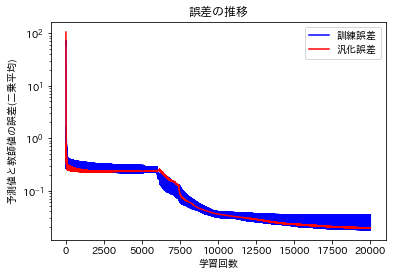

In [8]:
plt.figure()
plt.title("誤差の推移")
plt.xlabel("学習回数")
plt.ylabel("予測値と教師値の誤差(二乗平均)")

plt.yscale("log")
plt.plot(trainer.tx, trainer.te, color='blue', label='訓練誤差')
plt.plot(trainer.gx, trainer.ge, color='red', label='汎化誤差')
plt.legend()
plt.show()

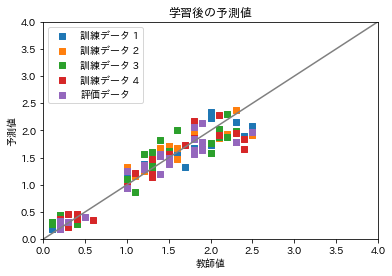

In [9]:
d_train, y_train, d_eval, y_eval = trainer.eval()

plt.figure()
plt.title("学習後の予測値")
plt.xlabel("教師値")
plt.ylabel("予測値")
plt.xlim(0.0, max(4.0, np.max(d_train), np.max(d_eval)))
plt.ylim(0.0, max(4.0, np.max(y_train), np.max(y_eval)))

for dataset in range(0, len(d_train)):
    plt.scatter(d_train[dataset].T, y_train[dataset].T, marker="s", label="訓練データ {}".format(dataset+1))

plt.scatter(d_eval.T, y_eval.T, marker="s", label="評価データ")

x = np.arange(-10,10,0.1)
plt.plot(x, x, color="gray")
plt.legend()
plt.show()


